In [4]:
!pip install numpy pandas scikit-fuzzy matplotlib requests

In [5]:
import pandas as pd #Baca & Olah dataset Csv
import numpy as np #Perhitungan matematis
import matplotlib.pyplot as plt #visualisasi grafik
import skfuzzy as fuzz #library utama untuk fuzzy logic
from skfuzzy import control as ctrl

# Baca dataset
df = pd.read_csv("Headache Based Data.csv")

print('Libraries imported')
print('Dataset loaded successfully')
print(df.head())

Libraries imported
Dataset loaded successfully
      CLASS  headache_days durationGroup   location  severity  \
0  migraine              2             H  bilateral  moderate   
1     sinus             13             M   forehead  moderate   
2   tension              2             M    orbital      mild   
3   cluster              7             F    orbital      mild   
4  migraine              3             M  bilateral      mild   

  characterisation nausea vomitting photophobia phonophobia  ... diplopia  \
0         pressing     no        no         yes          no  ...       no   
1         pressing     no        no          no          no  ...       no   
2         pressing     no        no          no         yes  ...       no   
3        pulsating    yes       yes          no         yes  ...       no   
4        throbbing    yes        no         yes         yes  ...       no   

  ataxia decreased_consciousness nasal_visual_symptomps paraesthesias  \
0    yes                  

In [6]:
df = pd.read_csv('Headache Based Data.csv')
print('Dataset loaded. Shape:', df.shape)
df.head()


Dataset loaded. Shape: (5150, 40)


,CLASS,headache_days,durationGroup,location,severity,characterisation,nausea,vomitting,photophobia,phonophobia,...,diplopia,ataxia,decreased_consciousness,nasal_visual_symptomps,paraesthesias,aura_development,headache_with_aura,aura_duration,hemiplegic,previous_attacks
0,migraine,2,H,bilateral,moderate,pressing,no,no,yes,no,...,no,yes,yes,yes,no,no,yes,none,yes,02-Feb-22
1,sinus,13,M,forehead,moderate,pressing,no,no,no,no,...,no,no,no,no,no,no,no,no,no,24-Jan-21
2,tension,2,M,orbital,mild,pressing,no,no,no,yes,...,no,no,no,no,no,no,no,no,no,10-May-24
3,cluster,7,F,orbital,mild,pulsating,yes,yes,no,yes,...,no,no,no,yes,no,no,yes,minutes,no,09-Jan-24
4,migraine,3,M,bilateral,mild,throbbing,yes,no,yes,yes,...,no,no,no,no,no,no,no,no,no,18-Jul-24


In [7]:
# --- 1️⃣ Ambil kolom yang dibutuhkan ---
# Misalnya kita ingin menganalisis hubungan antara lama sakit kepala, lokasi sakit, dan tingkat keparahan
df = df[['headache_days', 'location', 'severity']].copy()

# --- 2️⃣ Bersihkan data kolom numerik (headache_days) ---
# Pastikan nilainya numerik
df['headache_days'] = pd.to_numeric(df['headache_days'], errors='coerce')

# --- 3️⃣ Normalisasi teks untuk konsistensi ---
df['location'] = df['location'].str.strip().str.lower()
df['severity'] = df['severity'].str.strip().str.lower()

# --- 4️⃣ Hapus data kosong atau tidak valid ---
df = df.dropna(subset=['headache_days', 'location', 'severity']).reset_index(drop=True)

print('Dataset cleaned! Shape:', df.shape)
print(df.head())


Dataset cleaned! Shape: (5150, 3)
   headache_days   location  severity
0              2  bilateral  moderate
1             13   forehead  moderate
2              2    orbital      mild
3              7    orbital      mild
4              3  bilateral      mild


In [8]:
# Tentukan rentang nilai untuk variabel numerik
min_days = df['headache_days'].min()
max_days = df['headache_days'].max()

print(f"Lama sakit kepala (hari): {min_days} - {max_days}")

# --- Definisikan variabel fuzzy utama ---
# Input 1: Lama sakit kepala (dalam hari)
headache_days = ctrl.Antecedent(np.arange(min_days, max_days + 1, 1), 'headache_days')

# Input 2: Fotofobia (sensitivitas cahaya)
photophobia = ctrl.Antecedent(np.arange(0, 2, 1), 'photophobia')  # 0 = tidak, 1 = ya

# Input 3: Mual
nausea = ctrl.Antecedent(np.arange(0, 2, 1), 'nausea')  # 0 = tidak, 1 = ya

# Output: Tingkat keparahan sakit kepala
severity = ctrl.Consequent(np.arange(0, 11, 1), 'severity')

print("Fuzzy variables successfully defined.")


Lama sakit kepala (hari): 1 - 30
Fuzzy variables successfully defined.


In [9]:
# --- Membership Function untuk Lama Sakit Kepala (headache_days) ---
headache_days['short'] = fuzz.trapmf(headache_days.universe, [0, 0, 1, 3])
headache_days['medium'] = fuzz.trimf(headache_days.universe, [2, 5, 8])
headache_days['long'] = fuzz.trapmf(headache_days.universe, [6, 9, max_days, max_days])

# --- Membership Function untuk Photophobia (sensitivitas terhadap cahaya) ---
# 0 = tidak, 1 = ya
photophobia['no'] = fuzz.trimf(photophobia.universe, [0, 0, 1])
photophobia['yes'] = fuzz.trimf(photophobia.universe, [0, 1, 1])

# --- Membership Function untuk Nausea (mual) ---
# 0 = tidak, 1 = ya
nausea['no'] = fuzz.trimf(nausea.universe, [0, 0, 1])
nausea['yes'] = fuzz.trimf(nausea.universe, [0, 1, 1])

# --- Membership Function untuk Tingkat Keparahan (severity) ---
# Skala output 0–10
severity['mild'] = fuzz.trapmf(severity.universe, [0, 0, 3, 5])
severity['moderate'] = fuzz.trimf(severity.universe, [4, 6, 8])
severity['severe'] = fuzz.trapmf(severity.universe, [7, 9, 10, 10])

print("Membership functions for fuzzy variables successfully defined.")


Membership functions for fuzzy variables successfully defined.


C:\Users\User\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


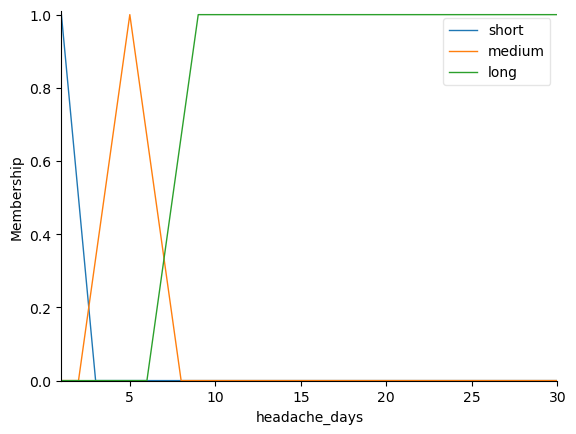

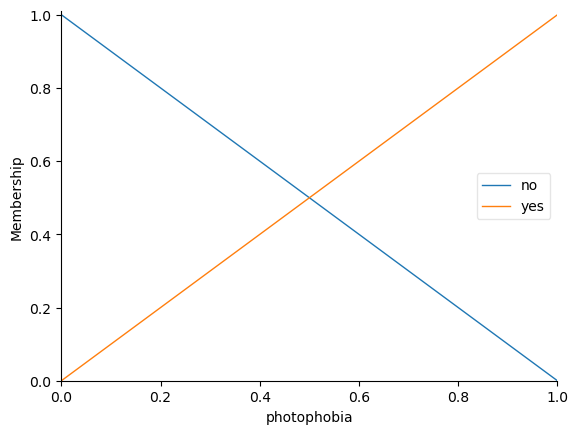

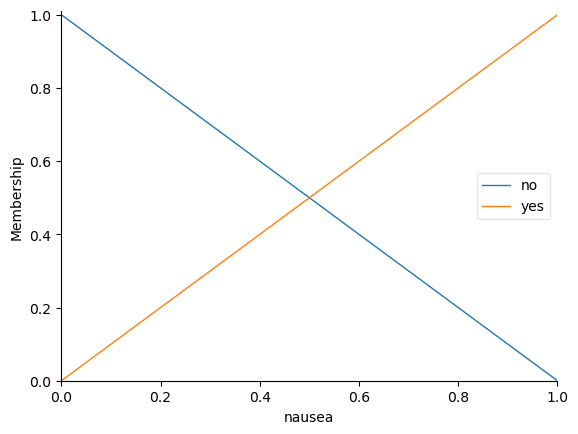

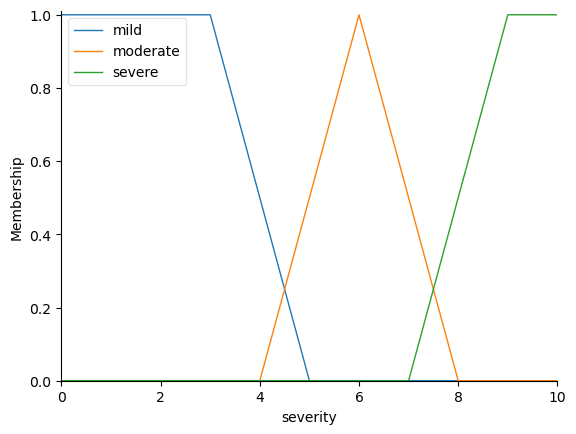

In [10]:
headache_days.view()
photophobia.view()
nausea.view()
severity.view()

plt.show()

In [22]:
# --- Definisi aturan fuzzy (IF - THEN) untuk menentukan tingkat keparahan sakit kepala ---

rule1 = ctrl.Rule(headache_days['long'], severity['severe'])
rule2 = ctrl.Rule(headache_days['medium'], severity['moderate'])
rule3 = ctrl.Rule(headache_days['short'], severity['mild'])

print("Fuzzy rules successfully defined.")

# Buat ControlSystem dari rules yang sudah didefinisikan
severity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Buat instance simulasi
severity_sim = ctrl.ControlSystemSimulation(severity_ctrl)

print("severity_ctrl created. Ready to compute severity with the fuzzy system.")


Fuzzy rules successfully defined.
severity_ctrl created. Ready to compute severity with the fuzzy system.


In [12]:
# Buat ControlSystem berdasarkan aturan fuzzy yang sudah didefinisikan
severity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Buat simulasi sistem fuzzy untuk perhitungan
severity_sim = ctrl.ControlSystemSimulation(severity_ctrl)

print("severity_ctrl created and ready to compute severity with the fuzzy system.")


severity_ctrl created and ready to compute severity with the fuzzy system.


In [13]:
# --- Fungsi untuk menghitung severity berdasarkan fuzzy logic ---
def compute_severity(row):
    # Buat simulasi fuzzy baru untuk setiap baris
    severity_simulation = ctrl.ControlSystemSimulation(severity_ctrl)

    # Inisialisasi variabel
    headache_days_value = None

    try:
        # Ambil nilai input dari dataset
        headache_days_value = row['headache_days']

        # Clip sesuai semesta variabel fuzzy
        headache_days_value = np.clip(headache_days_value, headache_days.universe[0], headache_days.universe[-1])

        # Masukkan nilai input ke sistem fuzzy
        severity_simulation.input['headache_days'] = headache_days_value

        # Jalankan perhitungan fuzzy
        severity_simulation.compute()

        # Kembalikan hasil output
        return severity_simulation.output['severity']

    except Exception as ex:
        print(f"Error computing for row {row.name}: {ex}")
        print(f"Inputs: headache_days={headache_days_value}")
        return np.nan


# Pastikan variabel `data` ada dan sesuai
data = df.copy()

# Terapkan fungsi ke seluruh dataset
data['severity_score'] = data.apply(compute_severity, axis=1)

print("Fuzzy severity score successfully computed!")
print(data[['headache_days', 'location', 'severity', 'severity_score']].head())


Fuzzy severity score successfully computed!
   headache_days   location  severity  severity_score
0              2  bilateral  moderate        2.259259
1             13   forehead  moderate        8.916667
2              2    orbital      mild        2.259259
3              7    orbital      mild        7.163399
4              3  bilateral      mild        6.000000


In [14]:
data.head()

,headache_days,location,severity,severity_score
0,2,bilateral,moderate,2.259259
1,13,forehead,moderate,8.916667
2,2,orbital,mild,2.259259
3,7,orbital,mild,7.163399
4,3,bilateral,mild,6.000000


In [15]:
print(data.columns)

Index(['headache_days', 'location', 'severity', 'severity_score'], dtype='object')


In [23]:
# Pastikan kolom 'severity_category' sudah ada
if 'severity_category' not in data.columns:
    def classify_severity(score):
        if pd.isna(score):
            return "Unknown"
        elif score >= 7.0:
            return "Severe"
        elif score >= 4.0:
            return "Moderate"
        else:
            return "Mild"

    data['severity_category'] = data['severity_score'].apply(classify_severity)
    print("Kolom 'severity_category' berhasil ditambahkan!")

# --- Tampilkan 10 data dengan tingkat keparahan tertinggi ---
top_cases = data.sort_values(by='severity_score', ascending=False).head(10)

# Simpan hasil ke file CSV
top_cases.to_csv("./top-severity.csv", index=False)

# Tampilkan kolom yang relevan (hanya yang benar-benar ada di dataset)
available_cols = [col for col in ['headache_days', 'location', 'severity_score', 'severity_category'] if col in top_cases.columns]
top_cases[available_cols]


,headache_days,location,severity_score,severity_category
1,13,forehead,8.916667,Severe
5130,18,orbital,8.916667,Severe
5133,29,bilateral,8.916667,Severe
5136,24,orbital,8.916667,Severe
5137,10,unilateral,8.916667,Severe
5143,14,bilateral,8.916667,Severe
5139,10,orbital,8.916667,Severe
5140,30,orbital,8.916667,Severe
7,11,forehead,8.916667,Severe
1670,17,orbital,8.916667,Severe


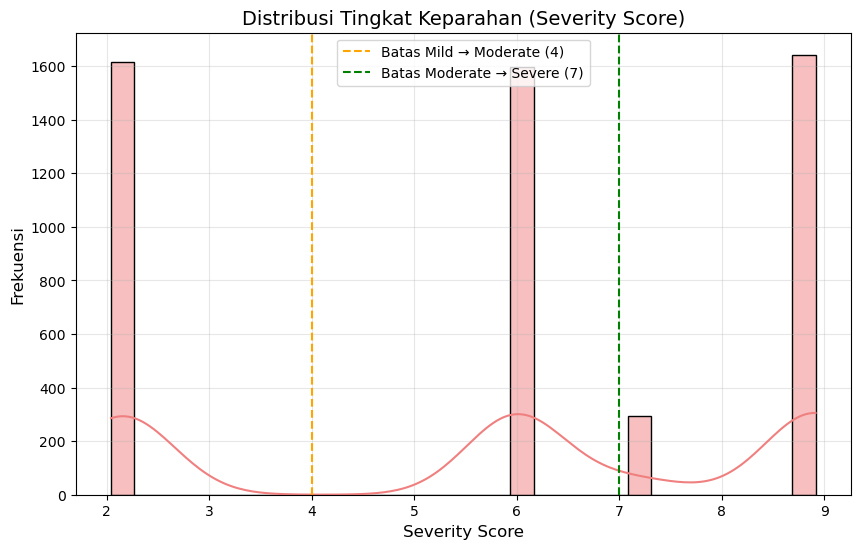

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data['severity_score'], kde=True, bins=30, color='lightcoral')

# Tambahkan garis batas kategori fuzzy
plt.axvline(4, color='orange', linestyle='--', label='Batas Mild → Moderate (4)')
plt.axvline(7, color='green', linestyle='--', label='Batas Moderate → Severe (7)')

# Labeling dan judul
plt.title("Distribusi Tingkat Keparahan (Severity Score)", fontsize=14)
plt.xlabel("Severity Score", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [18]:
# Insight: apakah durasi sakit kepala sesuai dengan tingkat keparahan fuzzy
def severity_trend(row):
    if row['headache_days'] >= 5 and row['severity_score'] < 5:
        return "Tidak sesuai (lama tapi ringan)"
    elif row['headache_days'] <= 2 and row['severity_score'] > 7:
        return "Tidak sesuai (singkat tapi parah)"
    else:
        return "Sesuai"

# Buat kolom insight baru
data['severity_trend'] = data.apply(severity_trend, axis=1)

print("Kolom insight 'severity_trend' berhasil ditambahkan!")
print(data[['headache_days', 'severity_score', 'severity_category', 'severity_trend']].head())

Kolom insight 'severity_trend' berhasil ditambahkan!
   headache_days  severity_score severity_category severity_trend
0              2        2.259259              Mild         Sesuai
1             13        8.916667            Severe         Sesuai
2              2        2.259259              Mild         Sesuai
3              7        7.163399            Severe         Sesuai
4              3        6.000000          Moderate         Sesuai
